# **plotting the triplet equilibrium**

In [3]:
library(ggplot2)
library(dplyr)
library(patchwork)
library(stringr)
library(tibble)
library(tidyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘patchwork’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”

In [4]:
data <- read.csv("data/trip_eq/tripeq_tripSummaryDf_2021_12_15_10h.csv")

In [93]:
colnames(data)[1] <- "triplet"

In [95]:
head(data)

triplet,mutability,log10mut,meanCount_0.0xMutCov,stderrCount_0.0xMutCov,meanCount_0.2xMutCov,stderrCount_0.2xMutCov,meanCount_0.4xMutCov,stderrCount_0.4xMutCov,meanCount_0.6xMutCov,...,meanCount_1.2xMutCov,stderrCount_1.2xMutCov,meanCount_1.4xMutCov,stderrCount_1.4xMutCov,meanCount_1.6xMutCov,stderrCount_1.6xMutCov,meanCount_1.8xMutCov,stderrCount_1.8xMutCov,meanCount_2.0xMutCov,stderrCount_2.0xMutCov
GCG,2.930548e-04,-3.533051,3204.6,40.04902,445.4,28.17666,271.6,8.04388,203.8,...,198.0,6.723095,202.0,2.416609,215.4,5.33704,196.8,5.947773,206.8,5.672389
GTT,2.080387e-05,-4.681856,3156.0,65.98424,3347.0,55.39982,3596.0,46.61588,3690.6,...,4103.8,35.804413,4208.2,70.798559,4240.2,36.89710,4278.4,13.973690,4337.6,37.840507
TTG,1.670667e-05,-4.777110,3062.4,35.94529,4455.8,32.03055,4664.4,27.64750,4707.8,...,4947.4,35.673015,4986.6,48.331398,5054.4,65.71928,5051.4,76.845325,5071.8,37.515277
GTG,2.072125e-05,-4.683584,3167.6,41.01980,3796.2,54.72436,3566.0,42.38679,3243.4,...,2994.6,56.815526,2983.2,25.808836,2905.8,48.12854,2908.4,25.072375,3023.4,15.218541
ATA,3.830079e-05,-4.416792,3169.2,53.02316,3630.2,57.79720,3960.6,40.97614,4163.4,...,4458.2,54.789379,4458.8,25.964899,4495.8,47.63146,4448.0,14.634207,4532.8,11.486340
ACC,4.907736e-05,-4.309119,3128.4,32.83023,2840.6,45.59215,2498.2,44.29939,2316.2,...,2063.4,31.947519,2054.0,13.679181,2010.8,30.75607,1924.0,15.607690,1894.8,35.236572


# **extracting regression values for each mutational coverage**

In [38]:
model_pValue <- function (modelobject) { # https://stackoverflow.com/questions/5587676/pull-out-p-values-and-r-squared-from-a-linear-regression
    if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
    f <- summary(modelobject)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
}

rsquareds <- c()
pValues <- c()
    
for(i in 1:length(colIndex_interest)){
    col_I <- colIndex_interest[i]
    fit <- lm(data[,col_I]~data$log10mut)
    rsquareds[i] <- summary(fit)$r.squared
    pValues[i] <- model_pValue(fit)
}

In [41]:
regresion_colsInterest <- data.frame(colnames(data[,colIndex_interest]),rsquareds,pValues)
colnames(regresion_colsInterest)[1]<-"mutational_coverage"

In [43]:
write.csv(regresion_colsInterest,"data/trip_eq/regression_output_2022_01_04.csv")

In [44]:
regresion_colsInterest

mutational_coverage,rsquareds,pValues
meanCount_0.0xMutCov,0.05685487,1.887719e-01
meanCount_0.2xMutCov,0.58681657,3.225110e-07
meanCount_0.4xMutCov,0.57003557,5.937060e-07
meanCount_0.6xMutCov,0.53370098,2.064892e-06
meanCount_1.0xMutCov,0.48488491,9.595460e-06
meanCount_2.0xMutCov,0.42604875,5.145159e-05


# **plotting trip freq vs mutability for different mutational coverages**

In [83]:
#if you want all figures to chare the same axes then use the max/min 
data_meanMax <-max(data[grep("mean", names(data))])+0.05*max(data[grep("mean", names(data))]) #need the extra 5% to make sure the plot with this point isnt right on the edge
data_meanMin<-min(data[grep("mean", names(data))])-0.05*min(data[grep("mean", names(data))])

Warning message:
“Removed 2 rows containing missing values (geom_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”Warning message:
“Removed 4 rows containing missing values (geom_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”Warning message:
“Removed 4 rows containing missing values (geom_smooth).”

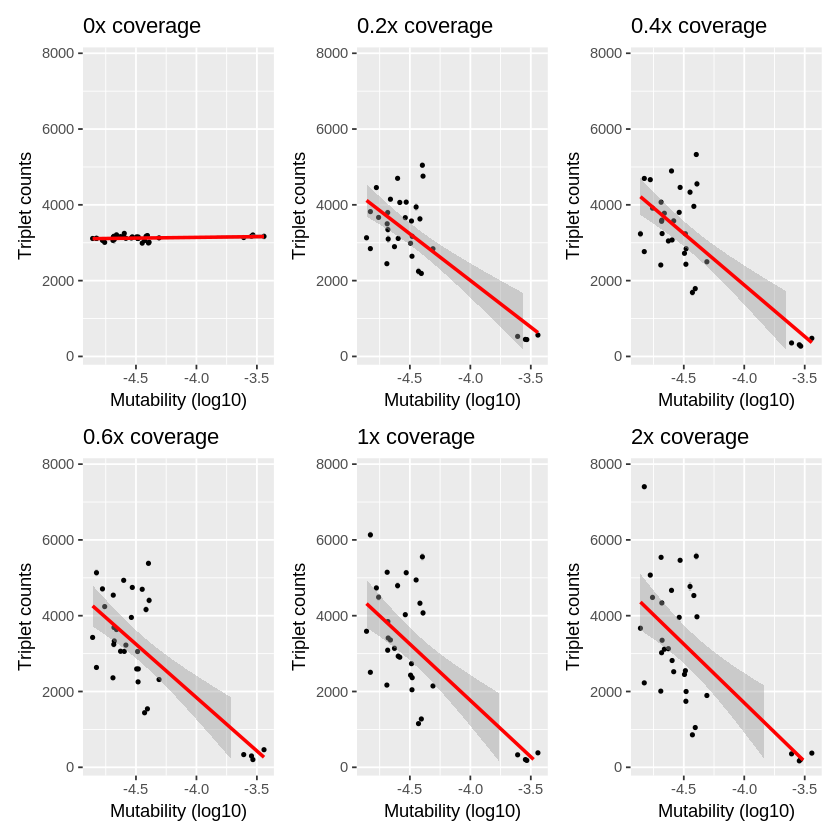

In [86]:
p20k <- ggplot(data,aes(x=log10mut,y=meanCount_2.0xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_2.0xMutCov-stderrCount_2.0xMutCov), ymax =(meanCount_2.0xMutCov+stderrCount_2.0xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "2x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p10k<- ggplot(data,aes(x=log10mut,y=meanCount_1.0xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_1.0xMutCov-stderrCount_1.0xMutCov), ymax =(meanCount_1.0xMutCov+stderrCount_1.0xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "1x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p06k <- ggplot(data,aes(x=log10mut,y=meanCount_0.6xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_0.6xMutCov-stderrCount_0.6xMutCov), ymax =(meanCount_0.6xMutCov+stderrCount_0.6xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "0.6x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p04k <- ggplot(data,aes(x=log10mut,y=meanCount_0.4xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_0.4xMutCov-stderrCount_0.4xMutCov), ymax =(meanCount_0.4xMutCov+stderrCount_0.4xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "0.4x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p02k <- ggplot(data,aes(x=log10mut,y=meanCount_0.2xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_0.2xMutCov-stderrCount_0.2xMutCov), ymax =(meanCount_0.2xMutCov+stderrCount_0.2xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "0.2x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p0k <- ggplot(data,aes(x=log10mut,y=meanCount_0.0xMutCov))+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=(meanCount_0.0xMutCov-stderrCount_0.0xMutCov), ymax =(meanCount_0.0xMutCov+stderrCount_0.0xMutCov)),color = "grey",width=0.02)+
    geom_point(size=0.8)+
    stat_smooth(method="lm", col = "red") +
    labs(
        x ="Mutability (log10)", 
        y = "Triplet counts",
        title = "0x coverage")#+
#     ylim(data_meanMin,data_meanMax)

p0k +p02k+p04k+p06k+p10k+p20k
# ggsave("plots/trip_eq_0x_1x_2x_mutCoverage_2021_12_15_sameAxes.pdf", width = 12,  height = 8)

# **plotting the chnage in triplet counts through different mutational coeravges**

In [101]:
head(data[-grep("std", names(data))])

triplet,mutability,log10mut,meanCount_0.0xMutCov,meanCount_0.2xMutCov,meanCount_0.4xMutCov,meanCount_0.6xMutCov,meanCount_0.8xMutCov,meanCount_1.0xMutCov,meanCount_1.2xMutCov,meanCount_1.4xMutCov,meanCount_1.6xMutCov,meanCount_1.8xMutCov,meanCount_2.0xMutCov
GCG,2.930548e-04,-3.533051,3204.6,445.4,271.6,203.8,225.6,182.0,198.0,202.0,215.4,196.8,206.8
GTT,2.080387e-05,-4.681856,3156.0,3347.0,3596.0,3690.6,3862.6,3846.2,4103.8,4208.2,4240.2,4278.4,4337.6
TTG,1.670667e-05,-4.777110,3062.4,4455.8,4664.4,4707.8,4835.0,4733.0,4947.4,4986.6,5054.4,5051.4,5071.8
GTG,2.072125e-05,-4.683584,3167.6,3796.2,3566.0,3243.4,3131.6,3089.6,2994.6,2983.2,2905.8,2908.4,3023.4
ATA,3.830079e-05,-4.416792,3169.2,3630.2,3960.6,4163.4,4287.8,4329.4,4458.2,4458.8,4495.8,4448.0,4532.8
ACC,4.907736e-05,-4.309119,3128.4,2840.6,2498.2,2316.2,2226.0,2146.6,2063.4,2054.0,2010.8,1924.0,1894.8


**converting the data into consequetive column comparisons for each triplet (for each gen)**

In [377]:
#setting up a df where the only col is the list of triplets 
triplets <- data$triplet
tripChnageGens_df <-data.frame(triplets)

#perform the consequetive col comps
data_meansOnly <- data[grep("mean", names(data))]
for(i in c(2:ncol(data_meansOnly))) {
    col1_data<- data_meansOnly[, colnames(data_meansOnly)[i-1]]
    col2_data<- data_meansOnly[, colnames(data_meansOnly)[i]]
    col1_cov <- unlist(strsplit(colnames(data_meansOnly)[i-1],"_"))[2]
    col2_cov <- unlist(strsplit(colnames(data_meansOnly)[i],"_"))[2]
    calc_name <- paste("from_",col1_cov,"_to_",col2_cov,sep="")
#     tripChnageGens_df[calc_name]<-((col2_data-col1_data)/col1_data)    
    tripChnageGens_df[calc_name]<-((col2_data-col1_data))
}
#transposing 
# tripChnageGens_df <- (t(tripChnageGens_df))#transpose https://stackoverflow.com/questions/6778908/transpose-a-data-frame
# colnames(tripChnageGens_df)<- tripChnageGens_df[1,]
# tripChnageGens_df <- tripChnageGens_df[2:nrow(tripChnageGens_df),]
# tripChnageGens_df<-as.data.frame(tripChnageGens_df)

In [379]:
colnames(tripChnageGens_df)[2] <- "0x to 0.2x"
colnames(tripChnageGens_df)[3] <- "0.2x to 0.4x"
colnames(tripChnageGens_df)[4] <- "0.4x to 0.6x"
colnames(tripChnageGens_df)[5] <- "0.6x to 0.8x"
colnames(tripChnageGens_df)[6] <- "0.8x to 1x"
colnames(tripChnageGens_df)[7] <- "1x to 1.2x"
colnames(tripChnageGens_df)[8] <- "1.2x to 1.4x"
colnames(tripChnageGens_df)[9] <- "1.4x to 1.6x"
colnames(tripChnageGens_df)[10] <- "1.6x to 1.8x"
colnames(tripChnageGens_df)[11] <- "1.8x to 2x"


In [381]:
long_tripChnageGens_df <-gather(tripChnageGens_df, coverage_comparison, measurement, 2:11, factor_key=TRUE)
#http://www.cookbook-r.com/Manipulating_data/Converting_data_between_wide_and_long_format/

Saving 6.67 x 6.67 in image


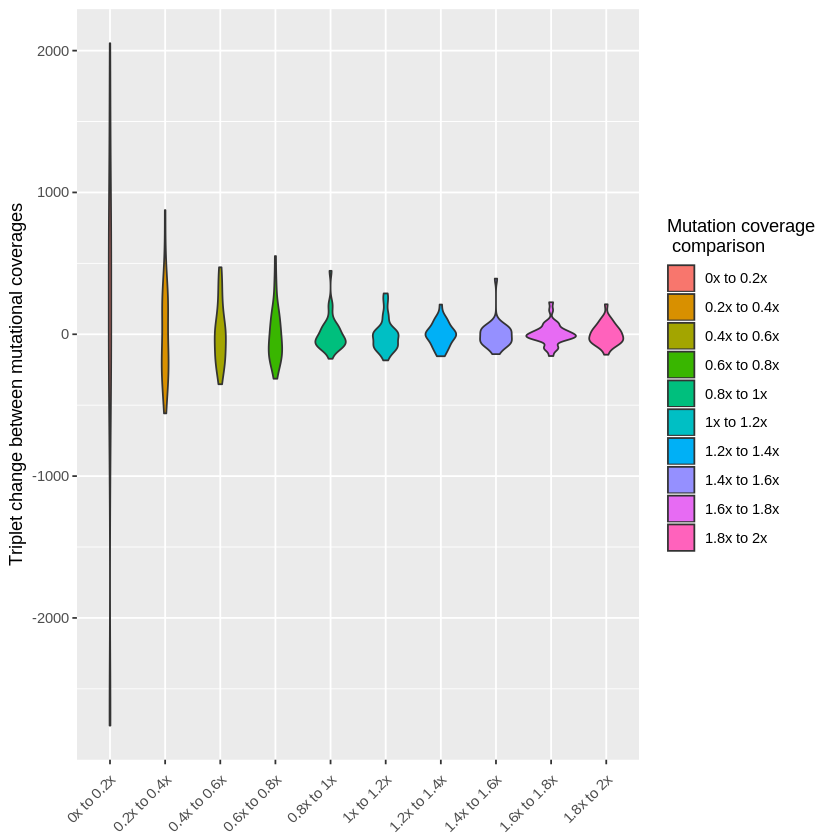

In [383]:
ggplot(long_tripChnageGens_df, aes(x=coverage_comparison, y=measurement, fill=coverage_comparison)) + 
    geom_violin()+
    theme(axis.text.x = element_text(angle = 45, vjust=0.9,hjust=1))+#https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
    theme(
        axis.title.x=element_blank(), #remove the x axis (title)
#         axis.text.x=element_blank(),  #https://stackoverflow.com/questions/35090883/remove-all-of-x-axis-labels-in-ggplot
#         axis.ticks.x=element_blank()  
    )+
    ylab("Triplet change between mutational coverages")+
    guides(fill=guide_legend(title="Mutation coverage \n comparison"))
# ggsave("plots/trip_eq_violin_2021_12_15_actualVals.pdf")

In [341]:
tripChnageGens_df[abs(tripChnageGens_df$from_1.4xMutCov_to_1.6xMutCov)>0.1,]

,triplets,from_0.0xMutCov_to_0.2xMutCov,from_0.2xMutCov_to_0.4xMutCov,from_0.4xMutCov_to_0.6xMutCov,from_0.6xMutCov_to_0.8xMutCov,from_0.8xMutCov_to_1.0xMutCov,from_1.0xMutCov_to_1.2xMutCov,from_1.2xMutCov_to_1.4xMutCov,from_1.4xMutCov_to_1.6xMutCov,from_1.6xMutCov_to_1.8xMutCov,from_1.8xMutCov_to_2.0xMutCov
28,ACG,-0.8218772,-0.1513111,-0.03006263,-0.112785192,-0.07326541,-0.006806283,-0.01634159,0.1452304,-0.05989705,-0.06719761
32,TCG,-0.8313998,-0.3266541,-0.05783268,-0.004171633,-0.01376421,-0.082524272,-0.04761905,0.1256944,-0.01357187,0.11194497


ERROR while rich displaying an object: Error: stat_ydensity requires the following missing aesthetics: x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default

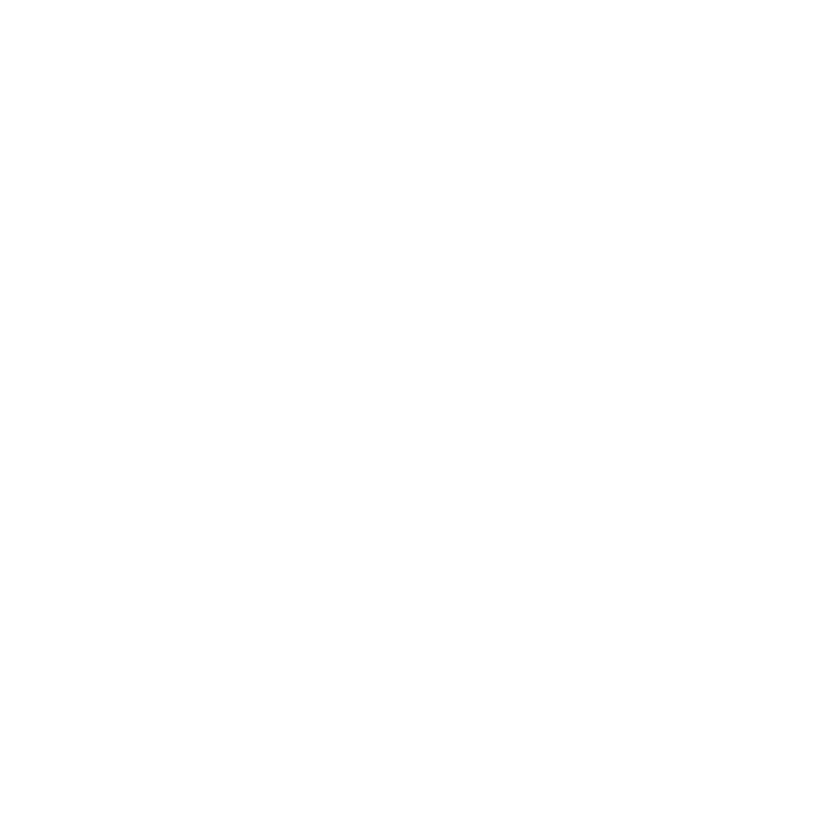

In [306]:
tripChnageGens_df$from_1.8xMutCov_to_2.0xMutCov

In [283]:
tripChnageGens_df<-tibble::rownames_to_column(tripChnageGens_df, "Gen")